In [61]:
import openface
import os.path as osp
facedir = '/media/data/frmwrks/faceface/'
modelDir = osp.join(facedir, 'openface/models/dlib', "shape_predictor_68_face_landmarks.dat")
align = openface.AlignDlib(modelDir)
netDir = osp.join(facedir, 'openface/models/openface', 'nn4.small2.v1.t7')
net = openface.TorchNeuralNet(netDir, imgDim=96, cuda=False)


In [62]:
import cPickle

In [73]:
with open('../conf/lfw_raw_triN.pkl') as fh:
    tidx = cPickle.load(fh)

In [74]:
import numpy as np
np.array(tidx['/static/dataset/lfw_raw/George_W_Bush/George_W_Bush_0482.jpg'])

array([ 0.09341638,  0.18246649, -0.11838507, -0.01285548,  0.064942  ,
        0.13266759,  0.05648147, -0.07652272,  0.12496037,  0.09884772,
       -0.07996817, -0.02067415,  0.00294771, -0.02948071,  0.01855626,
        0.05196372, -0.00945443, -0.11543863, -0.08740329, -0.04175861,
        0.04313108, -0.03876108, -0.09960025, -0.02708529,  0.05475826,
        0.01491077, -0.19665633, -0.05445366, -0.02459632,  0.10697686,
        0.07936437,  0.16268128, -0.15779647,  0.01602519, -0.05258409,
        0.1291087 ,  0.04192554,  0.04973068,  0.10250594,  0.0197434 ,
        0.08209101,  0.02226791,  0.036564  , -0.0292521 ,  0.1129147 ,
        0.09893629,  0.00508031,  0.06954127,  0.06254113, -0.03433194,
        0.05070866,  0.20299989, -0.09056783, -0.04339645,  0.14336058,
        0.0576732 , -0.01632899,  0.06823063,  0.03839124, -0.11033203,
       -0.10298995, -0.04080669,  0.02181776, -0.21160531, -0.00025657,
       -0.0642661 ,  0.08068661,  0.14591432,  0.00444634,  0.08

In [13]:
with open('../static/url.pkl') as fh:
    urldat = cPickle.load(fh)

In [18]:
urldat.items()[:5]

[(u'',
  {u'fb': [u'https: nothing'],
   u'im': [u'na'],
   u'li': [u'na'],
   u'tw': [u'https://twitter.com/?lang=en-au'],
   u'wi': [u'https://en.wikipedia.org/wiki/Main_Page']}),
 (u'jayne_yarris',
  {u'fb': [u'https://www.facebook.com/mynextlifesue'],
   u'im': [u'na'],
   u'li': [u'https://www.linkedin.com/in/jayneharris'],
   u'tw': [u'https://twitter.com/NickYarris?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor'],
   u'wi': [u'na']}),
 (u'allison_searing',
  {u'fb': [u'https://www.facebook.com/devilbunnyphotography'],
   u'im': [u'na'],
   u'li': [u'https://www.linkedin.com/in/allison-searing-0b515b38'],
   u'tw': [u'https://twitter.com/AllisonRoad_HQ/status/739251685265117184?ref_src=twsrc%5Etfw'],
   u'wi': [u'na']}),
 (u'kwame_kilpatrick',
  {u'fb': [u'https://www.facebook.com/nofriendsof.kwamekilpatrick'],
   u'im': [u'na'],
   u'li': [u'https://www.linkedin.com/in/kwame-kilpatrick-510b247'],
   u'tw': [u'https://twitter.com/kwameandfamily'],
   u'wi': [u'https://en.

In [11]:
ls ../static/dataset/lfw_raw/George_W_Bush/George_W_Bush_0482.jpg

../static/dataset/lfw_raw/George_W_Bush/George_W_Bush_0482.jpg


In [25]:
import cv2

In [65]:
img = cv2.imread('../static/upload/312d49c9aa3907973ff1a4412bd76497.jpg')

In [66]:
bb = align.getLargestFaceBoundingBox(img)
landmarks = align.findLandmarks(img, bb)
alignedFace = align.align(96, img, bb,
                          landmarks=landmarks,
                          landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)


In [67]:
%matplotlib inline
from matplotlib import pyplot as plt


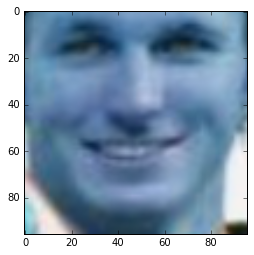

In [68]:
plt.imshow(alignedFace)

In [71]:
rep = net.forward(alignedFace)

In [72]:
rep[:30]

array([ 0.09323304,  0.18252715, -0.11840202, -0.01278645,  0.0650562 ,
        0.13254127,  0.05635567, -0.07660421,  0.1253643 ,  0.09891535,
       -0.08002108, -0.02037832,  0.00268227, -0.02964238,  0.01829293,
        0.05158301, -0.00956081, -0.11530567, -0.0876285 , -0.04162259,
        0.04273367, -0.03872094, -0.0998456 , -0.02713225,  0.05480788,
        0.01463935, -0.1965459 , -0.05409512, -0.02439739,  0.10692903])

In [12]:
import sys
sys.path.append('../util/')

In [13]:
from lsh import  LSH_sift

In [14]:
phash = LSH_sift(rep)

In [15]:
phash

'51001210001008100'

In [16]:
phash in tidx

False

In [43]:
import numpy as np
def embed_dist(x1, x2):
     diff = x1 - x2
     dist = np.dot(diff.T, diff)
     return dist


In [44]:
with open('../static/url.pkl') as fh:
    urldat = cPickle.load(fh)


In [69]:
identities = []
for k, v in tidx.items():
    name = k.split('/')[-2].lower()
    pname = k.split('/')[-2].replace('_', ' ')
    identities.append((k, pname, embed_dist(np.array(v), rep), '{:.3f}'.format(embed_dist(np.array(v), rep)), urldat[name]))


In [47]:
embed_dist(rep, v)

3.8582821068532077e-05

In [34]:
sorted_list = sorted(identities, key=lambda iden: iden[2])

In [35]:
len(identities)

13233

In [36]:
np.argmin([i[2] for i in identities])

12614

In [70]:
identities[:5]

[('/static/dataset/lfw_raw/George_W_Bush/George_W_Bush_0482.jpg',
  'George W Bush',
  5.2776001479265387e-06,
  '0.000',
  {u'fb': [u'https://www.facebook.com/georgewbush'],
   u'im': [u'https://www.imdb.com/name/nm0124133/'],
   u'li': [u'https://www.linkedin.com/in/georgewbush'],
   u'tw': [u'https://twitter.com/GeorgeWBush'],
   u'wi': [u'https://en.wikipedia.org/wiki/Barack_Obama']}),
 ('/static/dataset/lfw_raw/George_W_Bush/George_W_Bush_0519.jpg',
  'George W Bush',
  6.2834852557948774e-06,
  '0.000',
  {u'fb': [u'https://www.facebook.com/georgewbush'],
   u'im': [u'https://www.imdb.com/name/nm0124133/'],
   u'li': [u'https://www.linkedin.com/in/georgewbush'],
   u'tw': [u'https://twitter.com/GeorgeWBush'],
   u'wi': [u'https://en.wikipedia.org/wiki/Barack_Obama']}),
 ('/static/dataset/lfw_raw/Roger_Moore/Roger_Moore_0002.jpg',
  'Roger Moore',
  3.1664091111207907e-05,
  '0.000',
  {u'fb': [u'https://www.facebook.com/RogerMoore'],
   u'im': [u'https://www.imdb.com/name/nm00005

In [117]:
im0 = cv2.imread(r'/media/data/frmwrks/faceface/openface/data/lfw/dlib-affine-sz:96/Tom_Coverdale/Tom_Coverdale_0002.png')

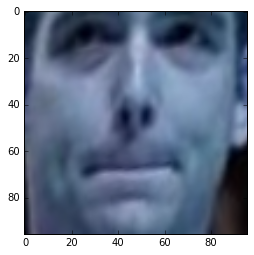

In [118]:
plt.imshow(im0)

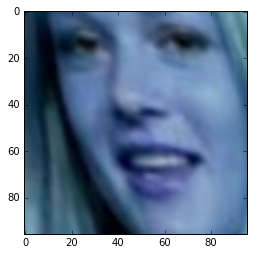

In [119]:
im1 = cv2.imread(r'/media/data/frmwrks/faceface/openface/data/lfw/dlib-affine-sz:96/AJ_Cook/AJ_Cook_0001.png')
plt.imshow(im1)

In [124]:
rep0 = net.forward(im0)
rep1 = net.forward(alignedFace)

In [125]:
embed_dist(rep0, rep1)

5.484785003282167e-05

(array([  3.,   4.,   9.,  14.,  23.,  25.,  16.,  17.,  11.,   6.]),
 array([-0.21129622, -0.16984008, -0.12838394, -0.0869278 , -0.04547167,
        -0.00401553,  0.03744061,  0.07889675,  0.12035289,  0.16180902,
         0.20326516]),
 <a list of 10 Patch objects>)

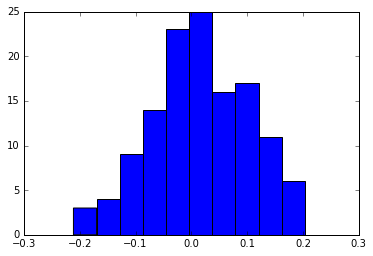

In [126]:
plt.hist(rep0)

(array([  3.,   4.,   9.,  14.,  23.,  26.,  16.,  16.,  11.,   6.]),
 array([-0.21038955, -0.16898141, -0.12757326, -0.08616511, -0.04475696,
        -0.00334881,  0.03805934,  0.07946748,  0.12087563,  0.16228378,
         0.20369193]),
 <a list of 10 Patch objects>)

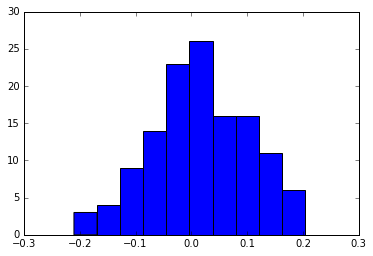

In [127]:
plt.hist(rep1)

In [79]:
np.max(alignedFace)

214

In [87]:
embed_dist(rep1, rep0)

5.5079216421562989e-05

In [98]:
im0.shape

(96, 96, 3)

In [4]:
min(tidx.keys())

'0000050020002100'

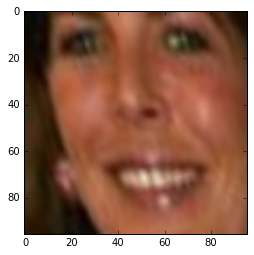

In [10]:
im = plt.imread('/media/data/frmwrks/faceface/openface/data/lfw/dlib-affine-sz:96/Princess_Caroline/Princess_Caroline_0001.png')
plt.imshow(im)

In [22]:
im1 = cv2.imread('/media/data/frmwrks/faceface/openface/data/lfw/dlib-affine-sz:96/Princess_Caroline/Princess_Caroline_0001.png')

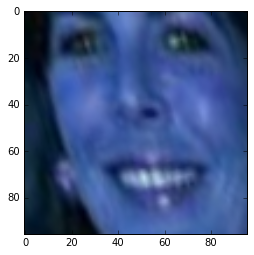

In [23]:
plt.imshow(im1)

In [32]:
rep1 = net.forward(im)

(array([  3.,   4.,   8.,  15.,  23.,  24.,  17.,  17.,  11.,   6.]),
 array([-0.21256366, -0.17112994, -0.12969622, -0.0882625 , -0.04682878,
        -0.00539505,  0.03603867,  0.07747239,  0.11890611,  0.16033983,
         0.20177355]),
 <a list of 10 Patch objects>)

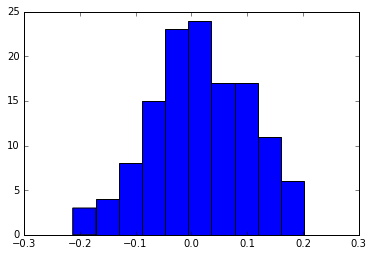

In [33]:
plt.hist(rep1)

In [14]:
np.min(rep1)

-0.21256364881991999

In [15]:
np.max(rep1)

0.20177355408669001

In [17]:
with open('rep1.pkl') as fh:
    rep01 = cPickle.load(fh)

In [18]:
rep01.shape

(128,)

(array([  3.,   4.,   9.,  14.,  23.,  25.,  16.,  17.,  11.,   6.]),
 array([-0.21126413, -0.16980986, -0.12835558, -0.0869013 , -0.04544702,
        -0.00399274,  0.03746153,  0.07891581,  0.12037009,  0.16182437,
         0.20327865]),
 <a list of 10 Patch objects>)

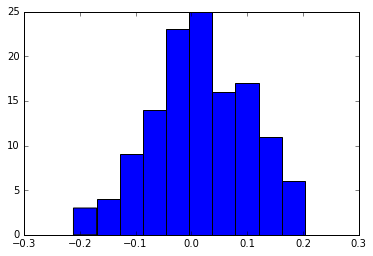

In [19]:
plt.hist(rep01)

In [21]:
with open('rep2.pkl') as fh:
    rep02 = cPickle.load(fh)

(array([  3.,   4.,   9.,  14.,  23.,  25.,  16.,  17.,  11.,   6.]),
 array([-0.21126413, -0.16980986, -0.12835558, -0.0869013 , -0.04544702,
        -0.00399274,  0.03746153,  0.07891581,  0.12037009,  0.16182437,
         0.20327865]),
 <a list of 10 Patch objects>)

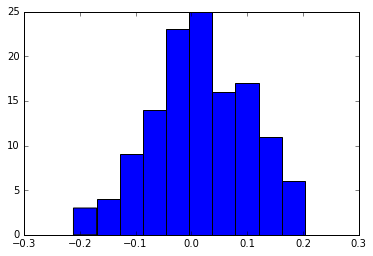

In [22]:
plt.hist(rep02)

In [23]:
embed_dist(tidx['0000050020002100']['vec'], rep02)

2.0509313938302909

In [24]:
embed_dist(rep01, rep02)

0.0

In [25]:
net.__file__

AttributeError: TorchNeuralNet instance has no attribute '__file__'

In [27]:
from PIL import Image

In [28]:
im2 = Image.open('/media/data/frmwrks/faceface/openface/data/lfw/dlib-affine-sz:96/Princess_Caroline/Princess_Caroline_0001.png')

In [30]:
im2

AttributeError: shape

In [34]:
print(openface.__file__)

/home/deep/anaconda2/lib/python2.7/site-packages/openface/__init__.pyc


In [35]:
import torchfile

In [36]:
data = torchfile.load('rep_cuda.t7')

(array([  1.,   4.,   9.,  14.,  26.,  20.,  34.,  15.,   4.,   1.]),
 array([-0.26052675, -0.21058198, -0.16063721, -0.11069244, -0.06074767,
        -0.0108029 ,  0.03914187,  0.08908664,  0.1390314 ,  0.18897617,
         0.23892094]),
 <a list of 10 Patch objects>)

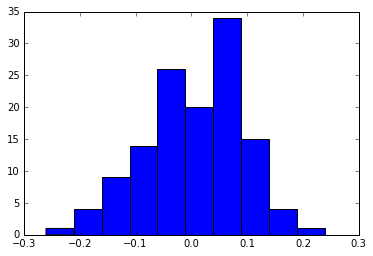

In [38]:
plt.hist(data)

(array([  4.,   6.,   5.,  20.,  20.,  23.,  17.,  17.,   6.,  10.]),
 array([-0.21630983, -0.1763624 , -0.13641497, -0.09646755, -0.05652012,
        -0.01657269,  0.02337474,  0.06332216,  0.10326959,  0.14321702,
         0.18316445]),
 <a list of 10 Patch objects>)

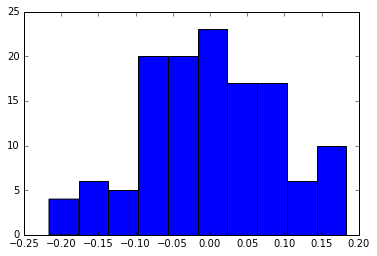

In [20]:
plt.hist(tidx['0000050020002100']['vec'])

In [41]:
tidx.keys()[:3]

['1300370065002000', '21001800120006500', '5100770098003900']

In [45]:
x1 , x2 = np.array(tidx['1300370065002000']['vec']), np.array(tidx['21001800120006500']['vec'])
print(embed_dist(x1, x2))

1.64716116806


In [21]:
im2 = plt.imread('../static/upload/312d49c9aa3907973ff1a4412bd76497.jpg')

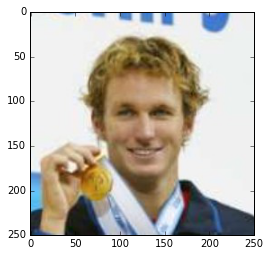

In [23]:
plt.imshow(im2)

In [75]:
x0, x1 = tidx.values()[0], tidx.values()[-1]

In [76]:
embed_dist(np.array(x0), np.array(x1))

2.3029828716669295e-05

In [77]:
x0, x1 = np.array(x0), np.array(x1)
diff = x0 - x1
dist = np.dot(diff.T, diff)



In [78]:
dist

2.3029828716669295e-05